Лабораторна робота №3
Баш Анастасія
МІТ-31

Частина 1: Бінарна класифікація на згенерованому наборі даних



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

Згенеруйте набір даних для бінарної класифікації за допомогою бібліотеки Scikit-Learn. Набір даних повинен містити дві числові ознаки і два класи. Використовуйте make_classification для генерації даних.
Розділіть дані на навчальний та тестовий набори.

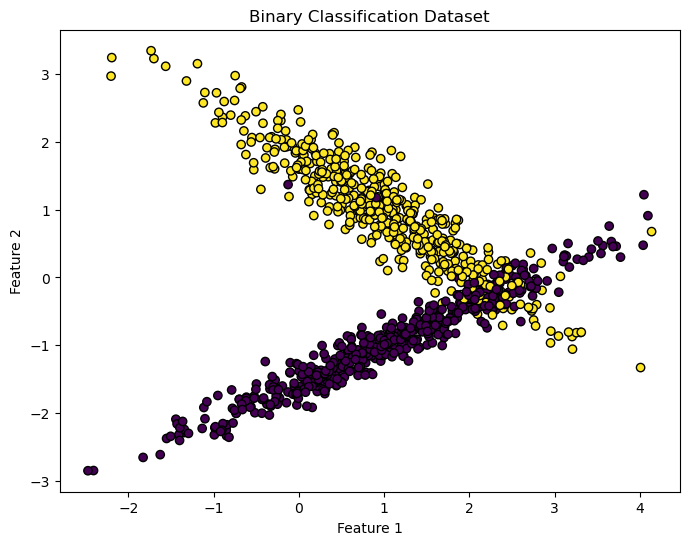

In [30]:
# Генерування набору даних для бінарної класифікації
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів
    n_features=2,    # Кількість ознак
    n_classes=2,     # Кількість класів
    n_clusters_per_class=1,  # Кількість кластерів на клас
    n_redundant=0,   # Кількість зайвих ознак
    random_state=42  # Випадковий зерно для відтворюваності
)

# Розділіть дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Візуалізація набору даних
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів).

In [32]:
# Ініціалізація та навчання логістичної регресії
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та AUC-ROC.

In [33]:
# Прогнозування на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінка ефективності класифікатора
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Вивід результатів
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

Accuracy: 0.90
Precision: 0.92
Recall: 0.86
F1 Score: 0.89
AUC-ROC Score: 0.90


Візуалізуйте результати, включаючи матрицю плутанини та графік ROC-кривої.

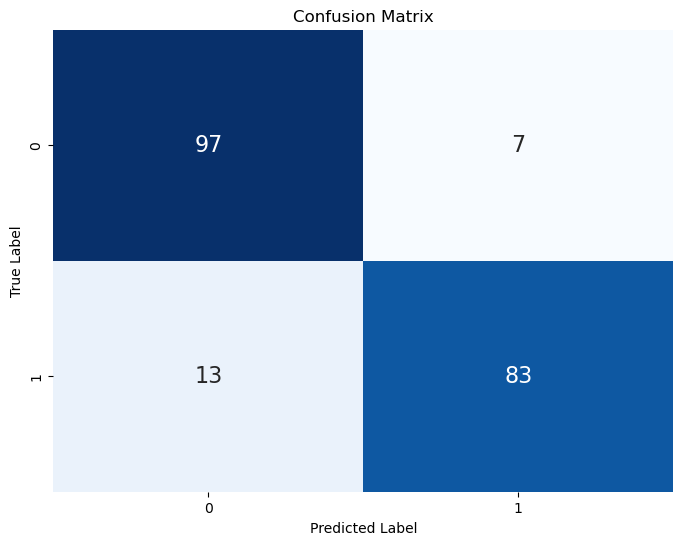

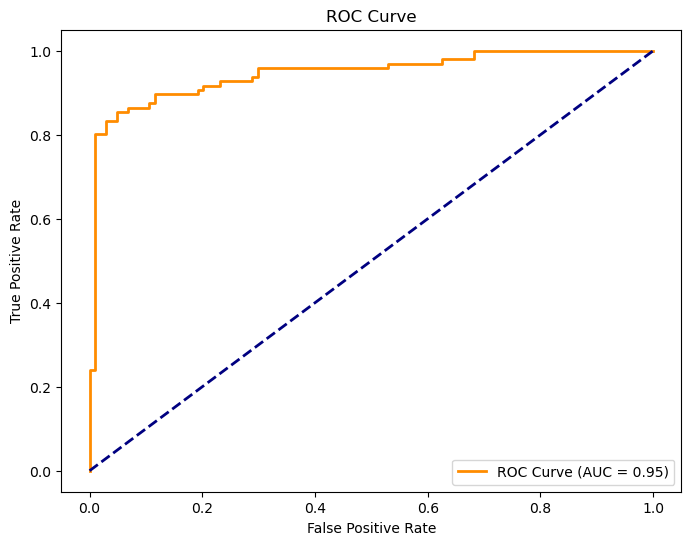

In [34]:
# Отримання матриці плутанини
cm = confusion_matrix(y_test, y_pred)

# Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Частина 2: Мультикласова класифікація на згенерованому наборі даних

Згенеруйте набір даних для мультикласової класифікації з трьома і більше класами за допомогою Scikit-Learn. Набір даних повинен містити числові ознаки та багато класів.
Розділіть дані на навчальний та тестовий набори.

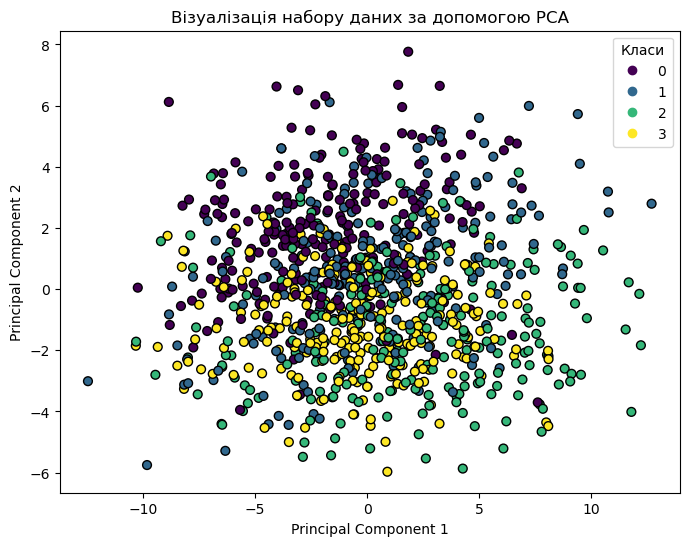

Розмірність тренувального набору: (800, 10)
Розмірність тестового набору: (200, 10)


In [35]:
# Генеруємо набір даних
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів у наборі даних
    n_features=10,   # Кількість ознак
    n_classes=4,     # Кількість класів
    n_clusters_per_class=1,  # Кількість кластерів у кожному класі
    n_informative=8,  # Кількість інформативних ознак
    random_state=42   # Фіксація генерації для відтворюваності
)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Створюємо графік
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('Візуалізація набору даних за допомогою PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Класи')
plt.show()

# Розділяємо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведемо розмірності наборів даних
print(f"Розмірність тренувального набору: {X_train.shape}")
print(f"Розмірність тестового набору: {X_test.shape}")

Навчіть класифікатори для мультикласової класифікації.
Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та матриця плутанини.

In [36]:
# Створюємо та навчаємо класифікатори
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Оцінка ефективності за допомогою різних метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Виведемо результати
    print(f"Метрики для класифікатора {clf_name}:")
    print(f"Точність: {accuracy:.4f}")
    print(f"Відгук: {recall:.4f}")
    print(f"F1-середнє: {f1:.4f}")
    print("Матриця плутанини:")
    print(cm)
    print("\n")

Метрики для класифікатора Logistic Regression:
Точність: 0.8300
Відгук: 0.8300
F1-середнє: 0.8294
Матриця плутанини:
[[47  2  0  8]
 [ 1 48  1  0]
 [ 2  4 38  5]
 [ 5  3  3 33]]


Метрики для класифікатора Decision Tree:
Точність: 0.7500
Відгук: 0.7500
F1-середнє: 0.7506
Матриця плутанини:
[[41  4  3  9]
 [ 5 37  6  2]
 [ 1  1 42  5]
 [11  1  2 30]]


Метрики для класифікатора Random Forest:
Точність: 0.8900
Відгук: 0.8900
F1-середнє: 0.8904
Матриця плутанини:
[[47  2  0  8]
 [ 1 49  0  0]
 [ 1  0 45  3]
 [ 4  1  2 37]]




Порівняйте результати різних класифікаторів.

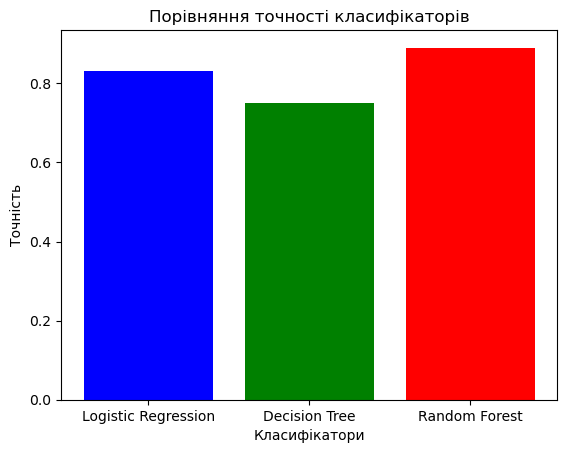

In [37]:
# Виведемо графік порівняння точності класифікаторів
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]

plt.bar(classifiers.keys(), accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Класифікатори')
plt.ylabel('Точність')
plt.title('Порівняння точності класифікаторів')
plt.show()



Всі три класифікатора показали непогану точність та хороші результати на цьому наборі даних. 
Найвищу точність показав класифікатор Random Forest.

Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету

Знайдіть реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle (або іншому джерелі даних).
Завантажте цей набір даних і розробіть процедуру для його очищення та підготовки до аналізу.

In [38]:
data = pd.read_csv("pokedex.csv")

# обробка даних видалення усіх рядків зі значеннями NULL дублікатів
data = data.dropna()
data = data.drop_duplicates()

data.head()

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0


In [39]:
df = data.copy()
df = df[['name', 'type']]
df

,name,type
0,Bulbasaur,grass
1,Ivysaur,grass
2,Venusaur,grass
3,Charmander,fire
4,Charmeleon,fire
...,...,...
778,Bruxish,water
779,Drampa,normal
781,Jangmo-o,dragon
782,Hakamo-o,dragon


Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор для мультилейбл класифікації (наприклад, з використанням багатошарової нейронної мережі).
Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
Проведіть аналіз результатів та вивчіть, які фактори впливають на ефективність моделі в контексті мультилейбл класифікації.

In [40]:
is_grass = list()
is_fire = list()
is_water = list()
is_normal = list()
is_dragon = list()

def make_type_map_list(type, listname, typename): #присвоює 0 або 1 взалежносі до приналежності до жанру
    if typename in type:
        listname.append(1)
    else:
        listname.append(0)

for s in df['type']:
    type = [type1.strip(" '") for type1 in s.strip("[]").split(",")]

    make_type_map_list(type, is_grass, "grass")
    make_type_map_list(type, is_fire , "fire")
    make_type_map_list(type, is_water, "water")
    make_type_map_list(type, is_normal, "normal")
    make_type_map_list(type, is_dragon, "dragon")

df['is_grass'] = is_grass
df['is_fire'] = is_fire
df['is_water'] = is_water
df['is_normal '] = is_normal 
df['is_dragon'] = is_dragon

df.head()

,name,type,is_grass,is_fire,is_water,is_normal,is_dragon
0,Bulbasaur,grass,1,0,0,0,0
1,Ivysaur,grass,1,0,0,0,0
2,Venusaur,grass,1,0,0,0,0
3,Charmander,fire,0,1,0,0,0
4,Charmeleon,fire,0,1,0,0,0


In [41]:
y = df.drop(['name', 'type'], axis=1)

# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(data['type'], y, test_size=0.20, random_state=42)

# Векторизація тексту за допомогою TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ініціалізуємо та навчаємо MLP класифікатор
clf = MLPClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Прогнозуємо на тестовому наборі
y_pred = clf.predict(X_test_tfidf)

# Оцінка точності та інших метрик
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy}')

# Classification report для оцінки точності, відгука та F1-середнього для кожного лейбла
report = classification_report(y_test, y_pred, target_names=y.columns)
print(f'Classification Report:\n{report}')

Accuracy on test data: 1.0
Classification Report:
              precision    recall  f1-score   support

    is_grass       1.00      1.00      1.00        15
     is_fire       1.00      1.00      1.00         8
    is_water       1.00      1.00      1.00        21
  is_normal        1.00      1.00      1.00        16
   is_dragon       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66
 samples avg       0.48      0.48      0.48        66



Результати виглядають дуже обіцяюче, оскільки точність 1.0 означає, що модель правильно класифікувала всі екземпляри тестового набору даних.
Загалом модель виглядає ефективно, але важливо розглядати ці метрики, особливо в контексті дисбалансу класів. Якщо виникає проблема з дисбалансом класів, це може призвести до перекосу результатів. Також, слід зазначити, що оцінка samples avg становить лише 0.48, що означає, що модель не завжди вгадує всі мітки для екземплярів. Це може бути пов'язано з дисбалансом класів або іншими аспектами даних.